In [2]:
import pandas as pd
import sklearn.preprocessing as pre
import xgboost as xgb
#pip install xgboost
import matplotlib.pyplot as plt
import seaborn as sns
#pip install sns
import numpy as np

In [35]:
train_data = pd.read_csv("train.csv")

In [36]:
total = train_data.isnull().sum().sort_values(ascending = False)
#将每一列的值都全部加起来
#isnull Array or bool indicating whether an object is null or if an array is given which of the element is null.
#按上升序列
#.sort_values(by, axis=0, ascending=True, inplace=False, kind='quicksort', na_position='last')[source]
#axis :{0 or ‘index’, 1 or ‘columns’}, default 0
#ascending : bool or list of bool, default True
#inplace : bool, default False

In [5]:
print type(total)

<class 'pandas.core.series.Series'>


In [6]:
print len(total)

292


In [8]:
print total[1]

13605


In [15]:
percent = (train_data.isnull().sum()/train_data.isnull().count()).sort_values(ascending = False)
#按照一行一行的读取是否为空，只要这一行有一个为空，那么这一行就为空

In [16]:
my_percent = (train_data.isnull().sum()/train_data.isnull().count()).sort_values(ascending = True)
#按照原顺序排列

In [37]:
print train_data.isnull().count()
print len(train_data.isnull().count())

id                                       30471
timestamp                                30471
full_sq                                  30471
life_sq                                  30471
floor                                    30471
max_floor                                30471
material                                 30471
build_year                               30471
num_room                                 30471
kitch_sq                                 30471
state                                    30471
product_type                             30471
sub_area                                 30471
area_m                                   30471
raion_popul                              30471
green_zone_part                          30471
indust_part                              30471
children_preschool                       30471
preschool_quota                          30471
preschool_education_centers_raion        30471
children_school                          30471
school_quota 

In [38]:
print train_data.isnull().sum()
#这一列为空的个数
print len(train_data.isnull().sum())

id                                           0
timestamp                                    0
full_sq                                      0
life_sq                                   6383
floor                                      167
max_floor                                 9572
material                                  9572
build_year                               13605
num_room                                  9572
kitch_sq                                  9572
state                                    13559
product_type                                 0
sub_area                                     0
area_m                                       0
raion_popul                                  0
green_zone_part                              0
indust_part                                  0
children_preschool                           0
preschool_quota                           6688
preschool_education_centers_raion            0
children_school                              0
school_quota 

In [12]:
print percent

hospital_beds_raion                      0.473926
build_year                               0.446490
state                                    0.444980
cafe_avg_price_500                       0.435857
cafe_sum_500_max_price_avg               0.435857
cafe_sum_500_min_price_avg               0.435857
max_floor                                0.314135
material                                 0.314135
num_room                                 0.314135
kitch_sq                                 0.314135
preschool_quota                          0.219487
school_quota                             0.219389
cafe_sum_1000_min_price_avg              0.214105
cafe_sum_1000_max_price_avg              0.214105
cafe_avg_price_1000                      0.214105
life_sq                                  0.209478
build_count_frame                        0.163795
build_count_1971-1995                    0.163795
build_count_block                        0.163795
raion_build_count_with_material_info     0.163795


In [17]:
print my_percent

id                                       0.000000
market_count_500                         0.000000
green_part_1000                          0.000000
prom_part_1000                           0.000000
office_count_1000                        0.000000
office_sqm_1000                          0.000000
trc_count_1000                           0.000000
trc_sqm_1000                             0.000000
cafe_count_1000                          0.000000
cafe_count_1000_na_price                 0.000000
cafe_count_1000_price_500                0.000000
cafe_count_1000_price_1000               0.000000
cafe_count_1000_price_1500               0.000000
cafe_count_1000_price_2500               0.000000
cafe_count_1000_price_4000               0.000000
sport_count_500                          0.000000
cafe_count_1000_price_high               0.000000
church_count_1000                        0.000000
mosque_count_1000                        0.000000
leisure_count_1000                       0.000000


In [18]:
print train_data.isnull()
#排除NA的干扰

          id timestamp full_sq life_sq  floor max_floor material build_year  \
0      False     False   False   False  False      True     True       True   
1      False     False   False   False  False      True     True       True   
2      False     False   False   False  False      True     True       True   
3      False     False   False   False  False      True     True       True   
4      False     False   False   False  False      True     True       True   
5      False     False   False   False  False      True     True       True   
6      False     False   False   False  False      True     True       True   
7      False     False   False   False  False      True     True       True   
8      False     False   False   False  False      True     True       True   
9      False     False   False   False  False      True     True       True   
10     False     False   False   False  False      True     True       True   
11     False     False   False   False  False      T

In [39]:
missing_data = pd.concat([total,percent],axis=1,keys = ["Total","Percentage"])
# 在默认的 axis=0 情况下，pd.concat([obj1,obj2]) 函数的效果与 obj1.append(obj2) 是相同的；
# 而在 axis=1 的情况下，pd.concat([df1,df2],axis=1) 的效果与
# pd.merge(df1,df2,left_index=True,right_index=True,how='outer') 是相同的。
print(missing_data)

                                       Total  Percentage
hospital_beds_raion                    14441    0.473926
build_year                             13605    0.446490
state                                  13559    0.444980
cafe_avg_price_500                     13281    0.435857
cafe_sum_500_max_price_avg             13281    0.435857
cafe_sum_500_min_price_avg             13281    0.435857
max_floor                               9572    0.314135
material                                9572    0.314135
num_room                                9572    0.314135
kitch_sq                                9572    0.314135
preschool_quota                         6688    0.219487
school_quota                            6685    0.219389
cafe_sum_1000_min_price_avg             6524    0.214105
cafe_sum_1000_max_price_avg             6524    0.214105
cafe_avg_price_1000                     6524    0.214105
life_sq                                 6383    0.209478
build_count_frame              

In [40]:
train_data = train_data.drop(missing_data[missing_data["Total"]>0].index,1)
#axis=1是去除列
#axis=0是去除行
# drop(labels, axis=0, level=None, inplace=False, errors='raise')
# Return new object with labels in requested axis removed.
#只去掉label中的index的值

In [21]:
print train_data

          id   timestamp  full_sq   product_type                   sub_area  \
0          1  2011-08-20       43     Investment                   Bibirevo   
1          2  2011-08-23       34     Investment          Nagatinskij Zaton   
2          3  2011-08-27       43     Investment             Tekstil'shhiki   
3          4  2011-09-01       89     Investment                     Mitino   
4          5  2011-09-05       77     Investment                  Basmannoe   
5          6  2011-09-06       67     Investment             Nizhegorodskoe   
6          7  2011-09-08       25     Investment                 Sokol'niki   
7          8  2011-09-09       44     Investment                   Bibirevo   
8          9  2011-09-10       42     Investment                    Koptevo   
9         10  2011-09-13       36     Investment                    Kuncevo   
10        11  2011-09-16       36     Investment           Kosino-Uhtomskoe   
11        12  2011-09-16       38     Investment    

In [28]:
print missing_data[missing_data["Total"]>0].index
print len(missing_data[missing_data["Total"]>0].index)
#是那些多次出现的行的label

Index([u'hospital_beds_raion', u'build_year', u'state', u'cafe_avg_price_500',
       u'cafe_sum_500_max_price_avg', u'cafe_sum_500_min_price_avg',
       u'max_floor', u'material', u'num_room', u'kitch_sq', u'preschool_quota',
       u'school_quota', u'cafe_sum_1000_min_price_avg',
       u'cafe_sum_1000_max_price_avg', u'cafe_avg_price_1000', u'life_sq',
       u'build_count_frame', u'build_count_1971-1995', u'build_count_block',
       u'raion_build_count_with_material_info', u'build_count_after_1995',
       u'build_count_brick', u'build_count_wood', u'build_count_mix',
       u'build_count_1921-1945', u'build_count_panel', u'build_count_foam',
       u'build_count_slag', u'raion_build_count_with_builddate_info',
       u'build_count_monolith', u'build_count_before_1920',
       u'build_count_1946-1970', u'cafe_sum_1500_min_price_avg',
       u'cafe_sum_1500_max_price_avg', u'cafe_avg_price_1500',
       u'cafe_sum_2000_max_price_avg', u'cafe_avg_price_2000',
       u'cafe_sum_2000

In [50]:
for f in train_data:
    if train_data[f].dtype == "object":
        lbl=pre.LabelEncoder()
        lbl.fit(list(train_data[f].values))
        #把时间都转为list
        train_data[f]=lbl.transform(list(train_data[f].values))

In [ ]:
# print train_data
#将object进行排序操作

          id  timestamp  full_sq  product_type  sub_area        area_m  \
0          1          0       43             0         9  6.407578e+06   
1          2          1       34             0        70  9.589337e+06   
2          3          2       43             0       129  4.808270e+06   
3          4          3       89             0        65  1.258354e+07   
4          5          4       77             0         6  8.398461e+06   
5          6          5       67             0        73  7.506452e+06   
6          7          6       25             0       122  1.032047e+07   
7          8          7       44             0         9  6.407578e+06   
8          9          8       42             0        44  4.787424e+06   
9         10          9       36             0        50  5.235177e+07   
10        11         10       36             0        45  1.488362e+07   
11        12         10       38             0       143  7.632940e+06   
12        13         11       43      

In [41]:
# 行数：len(df) or len(df.index) or df.shape[0]
# 列数: len(df.columns) or df.shape[1]
print train_data.shape[1]

241


In [45]:
i=0
for f in train_data:
# f是label
    i+=1
    if i>4:
        break
    print train_data[f].dtype

int64
object
int64
object


In [46]:
my_lbl=pre.LabelEncoder()
my_lbl.fit(['zzq','www','xsm'])

LabelEncoder()

In [47]:
my_lbl.classes_

array(['www', 'xsm', 'zzq'], 
      dtype='|S3')

In [49]:
my_lbl.transform(['zzq','www','xsm'])
#一个排序操作

array([2, 0, 1])

In [52]:
xgb_params = {
    'eta': 0.05,
    'max_depth': 8,
    'subsample': 0.7,
    'colsample_bytree': 0.7,
    'objective': 'reg:linear',
    'eval_metric': 'rmse',
    'silent': 1
}

<function matplotlib.pyplot.show>

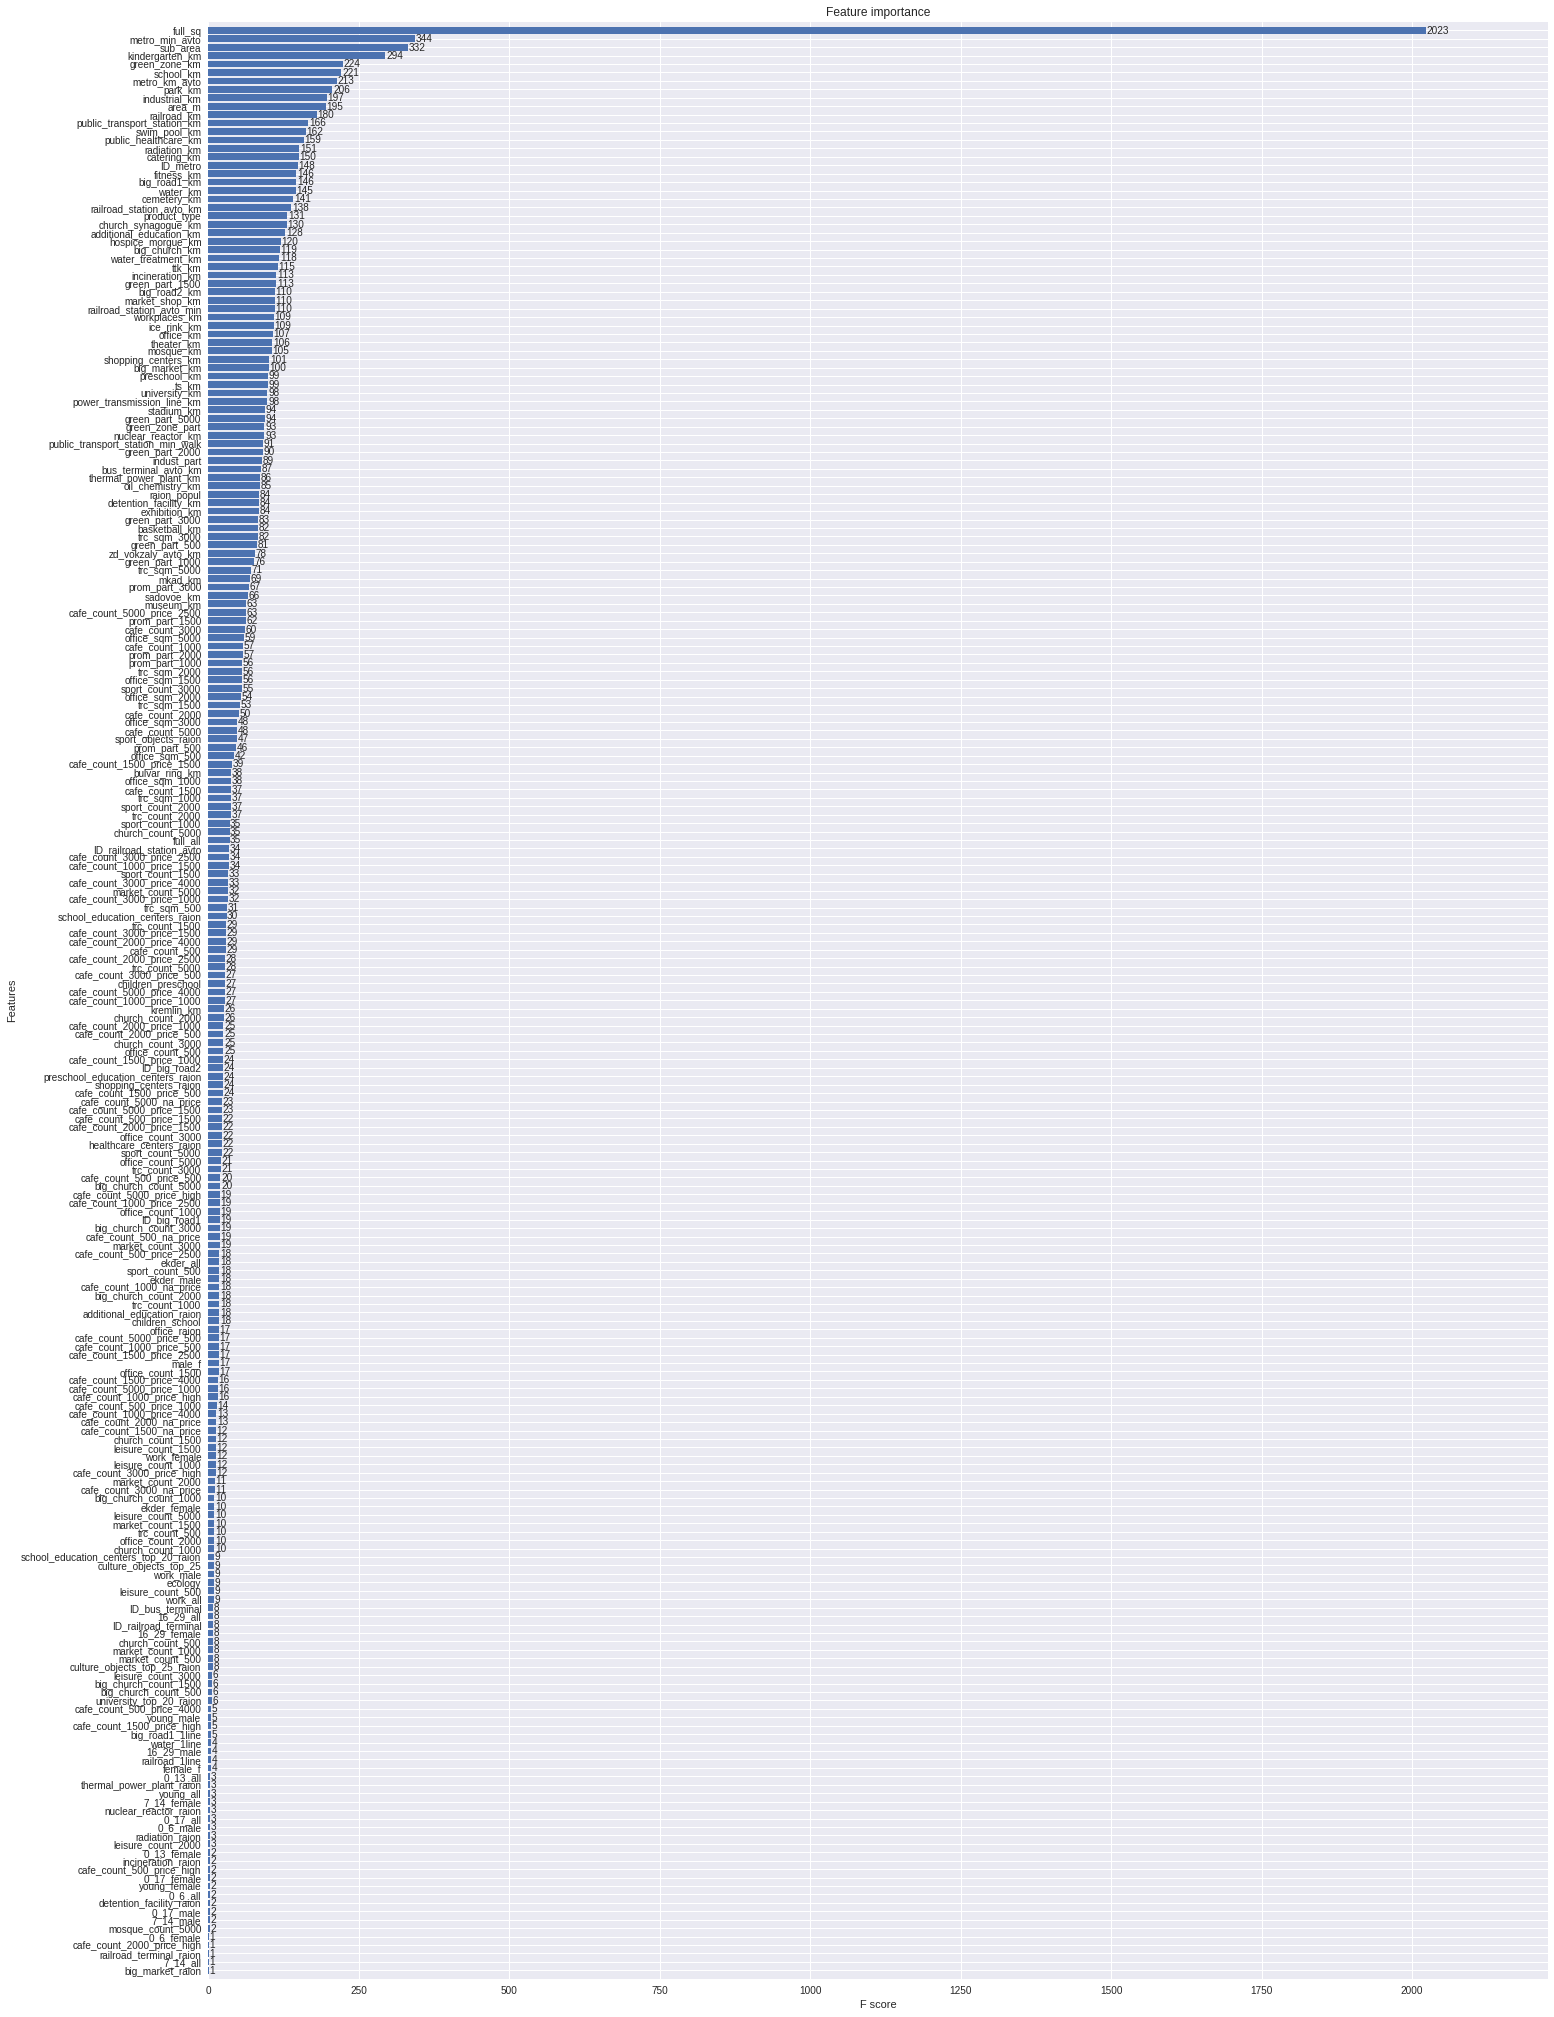

In [60]:
%matplotlib inline
y_train = train_data["price_doc"]
x_train = train_data.drop(["id","timestamp","price_doc"],axis = 1)
dtrain = xgb.DMatrix(x_train,y_train,feature_names = x_train.columns.values)
model = xgb.train(dict(xgb_params,silent=0),dtrain,num_boost_round=100)

fig,ax=plt.subplots(figsize = (24,36))
xgb.plot_importance(model,  height=0.8, ax=ax)
plt.show

In [62]:
print model

In [63]:
cols = ["price_doc","full_sq","metro_min_avto","sub_area","kindergarten_km","green_zone_km","school_km","park_km","industrial_km"]
train_data["price_doc"]= np.log(train_data["price_doc"])

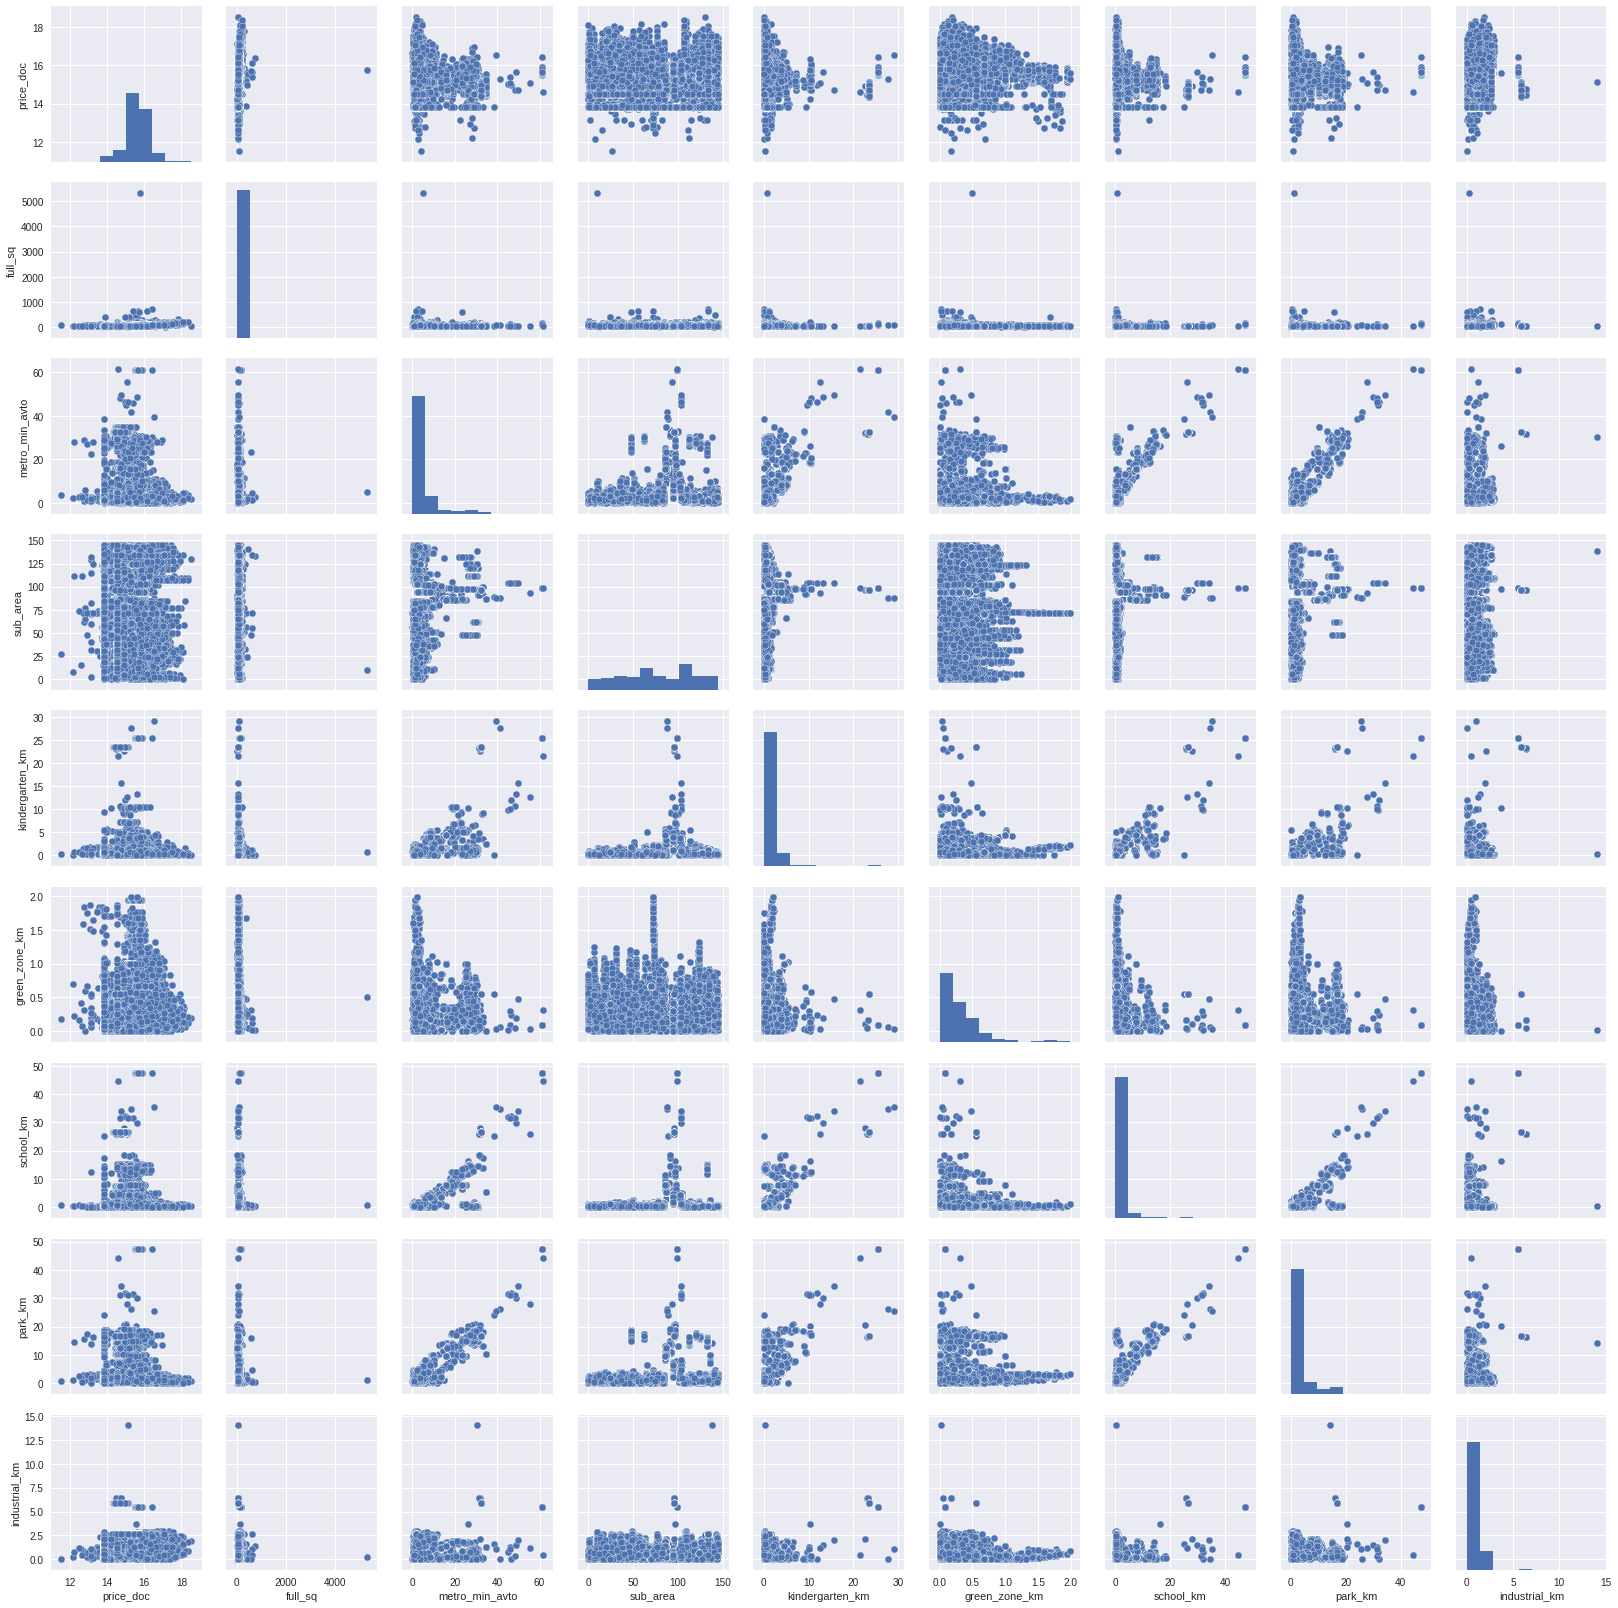

In [67]:
#Check the plots with each of the variables
corrmat = train_data.corr()
sns.pairplot(train_data[cols],size = 2.5)
plt.savefig('feature.jpg')
plt.show()

## 该代码主要进行挑选了哪些特征是比较重要的工作，然后就是Xgboost的使用和一些技能